In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
import seaborn as sns
from scipy.stats import probplot
from scipy import stats


%matplotlib inline

In [229]:
data = pd.read_csv("../input/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [181]:
data.drop(columns=["PassengerId", "Cabin", "Ticket", "Name", "Embarked"], axis=1, inplace=True)

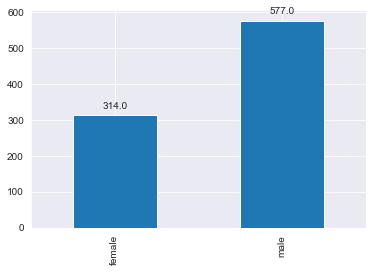

In [182]:
ax = data['Sex'].value_counts().sort_values(ascending=True).plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')

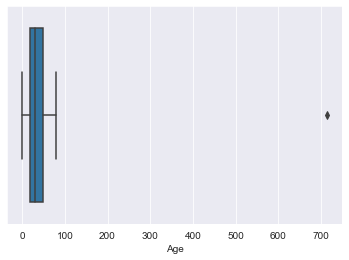

In [183]:
sns.boxplot(data['Age'].describe())

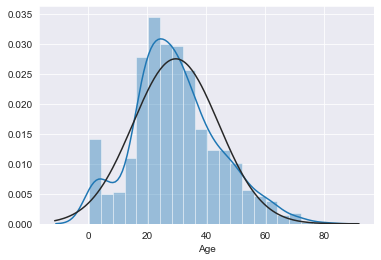

In [184]:
from scipy.stats import norm
sns.distplot(data['Age'], fit=norm)

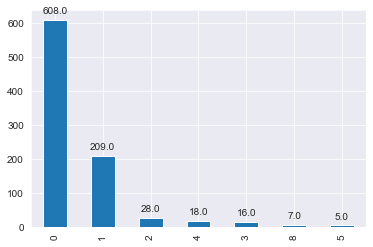

In [185]:
ax = data['SibSp'].value_counts().plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')

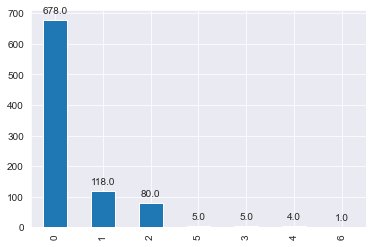

In [186]:
ax = data['Parch'].value_counts().plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')

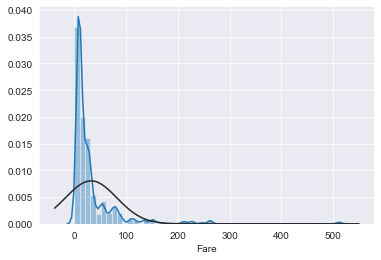

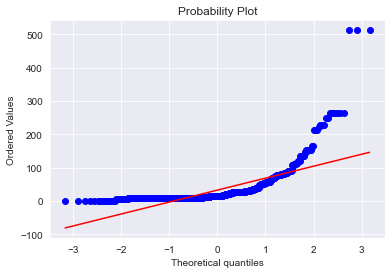

In [187]:

sns.distplot(data['Fare'], fit=norm)
plot = plt.figure()
_ = probplot(data['Fare'], plot=plt)

In [188]:
data['Fare'] = np.log(data['Fare']+0.1)

In [190]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [191]:
sex = {'male':0, 'female':1}

data['Sex'] = data['Sex'].map(sex)

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [193]:
y = data['Survived']
X = data.drop(columns=['Survived'], axis=1)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [195]:
dtree = DecisionTreeClassifier()

In [196]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,5,1),
    'min_samples_split': range(2,7,1),
    'splitter' : ['best', 'random']
    
}

In [197]:
clf = GridSearchCV(dtree, params, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 7),
                         'splitter': ['best', 'random']})

In [198]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [199]:
y_pred = clf.predict_proba(X_test)
metrics.log_loss(y_test, y_pred, eps=1e-15)

0.9012718881622491

In [200]:
y_pred = clf.predict(X_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.76      0.88      0.82       153\n           1       0.80      0.63      0.71       115\n\n    accuracy                           0.78       268\n   macro avg       0.78      0.76      0.76       268\nweighted avg       0.78      0.78      0.77       268\n'

In [201]:
metrics.accuracy_score(y_test, y_pred)

0.7761194029850746

In [202]:
metrics.confusion_matrix(y_test, y_pred)

array([[135,  18],
       [ 42,  73]], dtype=int64)

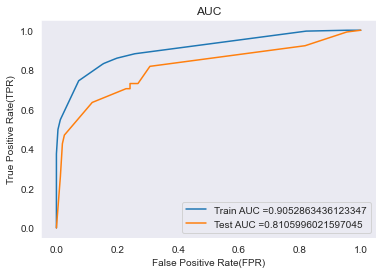

In [204]:
def pred_prob(clf, data): 
    y_pred = []
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

clf = GridSearchCV(dtree, params, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

y_train_pred = pred_prob(clf,X_train)
y_test_pred = pred_prob(clf,X_test)



train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [206]:
import pickle
file_name = '../models/decision_tree_model.sav'

pickle.dump(clf, open(file_name, 'wb'))

In [217]:
model = pickle.load(open(file_name, 'rb'))
model.predict([[1,1,48.0,0,0,3.259219]])

array([1], dtype=int64)

In [218]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare
862,1,1,48.0,0,0,3.259219
223,3,0,28.0,0,0,2.078916
84,2,1,17.0,0,0,2.360854
680,3,1,28.0,0,0,2.108697
535,2,1,7.0,0,2,3.271468
...,...,...,...,...,...,...
247,2,1,24.0,0,2,2.681022
551,2,0,27.0,0,0,3.261935
239,2,0,33.0,0,0,2.515678
484,1,0,25.0,1,0,4.512827


1. Pclass : Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
2. Sex : male or female
3. SibSp : # of siblings / spouses aboard the Titanic
4. Age : age
5. Parch : # of parents / children aboard the Titanic
6. Fare : Passenger fare